# Statistical Modeling

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Arpat

In [ ]:
temp_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/mouse"
data_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Data/sam_arpat"
script_path_infrastructure = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure"
import sys
sys.path.insert(0, '/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

disomes = [os.path.join(data_repo_dir, i) for i in ["SRR9715828.sam", "SRR9715826.sam"]]
monosomes = [os.path.join(data_repo_dir, i) for i in ["SRR1930189.sam", "SRR1930188.sam"]]

I = Infrastructre(temp_repo_dir,
                  ensembl_release=102,
                  organism="mus_musculus",
                  #include_gene3d=True,
                  verbose=True)

I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, monosomes, disomes, "sixtymers",
                                       riboseq_assign_to="best_transcript", riboseq_assign_at=-15,
                                       protein_genome_instance=I.protein_genome,
                                       gene_info_dictionary=I.gene_info,
                                       exclude_genes=I.exclude_genes, verbose=I.verbose,
                                       footprint_len_experiment=list(range(45,71)),  # From paper
                                       footprint_len_background=list(range(26, 36))  # From paper
                                       )

#### Bukau

In [2]:
temp_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/"
data_repo_dir = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/Data/sam_bukau"
script_path_infrastructure = "/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure"
import sys
sys.path.insert(0, '/home/kai/HDD_Kemal/from_raf_computer/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

spt = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_TT1.sam", "Sixtymers_TT2.sam"]]
sps = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_Rep1.sam", "Sixtymers_Rep2.sam", "Sixtymers_NoPK.sam"]]

erb_serb = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
erb_total = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]
nac_serb = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
nac_total = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]

coco_d = [os.path.join(data_repo_dir, i) for i in ["Coco_Dis1.sam", "Coco_Dis2.sam"]]
coco_m = [os.path.join(data_repo_dir, i) for i in ["Coco_Mono1.sam", "Coco_Mono2.sam"]]

exclude_genes = ["ENSG00000160789"]

I = Infrastructre(temp_repo_dir,
                  exclude_genes=exclude_genes,
                  ensembl_release=102,
                  organism="homo_sapiens",
                  #include_gene3d=True,
                  verbose=True)
I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, spt, sps, "sixtymers",
                                        riboseq_assign_to="best_transcript", riboseq_assign_at="auto",
                                        protein_genome_instance=I.protein_genome,
                                        gene_info_dictionary=I.gene_info,
                                        exclude_genes=I.exclude_genes, verbose=I.verbose)
# Should be first to calculate, since multiprocessing is quite memory inefficient.
I.riboseq_coco = RiboSeqCoco(I.temp_repo_dir, coco_m, coco_d, "cocoassembly",
                             riboseq_assign_to="best_transcript", riboseq_assign_at=-15,
                             protein_genome_instance=I.protein_genome,
                             gene_info_dictionary=I.gene_info,
                             exclude_genes=I.exclude_genes, verbose=I.verbose)

/home/kai/anaconda3/envs/kemals/lib/python3.6/site-packages/ipykernel_launcher.py:26: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.


[03/07/2021 20:41:07 CEST] Gene information dictionary is found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/gene_info_database.joblib


INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.cdna.all.fa.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/Homo_sapiens.GRCh38.pep.all.fa.pickle


[03/07/2021 20:41:32 CEST] ProteinGenome found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/protein_genome_instance.joblib
[03/07/2021 20:41:41 CEST] RiboSeq assignment for sixtymers_background found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_sixtymers_background.joblib
[03/07/2021 20:41:45 CEST] RiboSeq assignment for sixtymers_experiment found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_sixtymers_experiment.joblib
[03/07/2021 20:41:50 CEST] RiboSeq assignment for cocoassembly_background found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_background.joblib
[03/07/2021 20:41:54 CEST] RiboSeq assignment for cocoassembly_experiment found in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_experiment.joblib
Fitting calculations found for cocoassembly in path: /home/kai/HDD_Kemal/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_fitting_c

#### Additional

In [3]:
def bootstrap(data, n=1000, func=np.mean, p=0.95):
    data = data[~np.isnan(data)]
    # Bootstrap is conducted by sampling with replacement
    sample_size = len(data)
    simulations = [func(np.random.choice(data, size=sample_size, replace=True)) for i in range(n)]
    low_ci = np.percentile(simulations, 100*(1-p)/2)
    high_ci = np.percentile(simulations, 100*(1-(1-p)/2))
    return (low_ci, high_ci)
def normalization(data1d):
    return (data1d - np.nanmin(data1d)) / (np.nanmax(data1d) - np.nanmin(data1d))
def confidence_interval_normal(metag, confidence=0.95):
    ci = np.empty((2, metag.shape[1]))
    for i in range(metag.shape[1]):
        data = metag[:, i]
        mean=np.nanmean(data)
        std=np.nanstd(data, ddof=1)
        size=np.sum(~np.isnan(data))
        alpha=1-confidence
        t_score=stats.t.isf(alpha/2,df=(size-1))
        ME=t_score*std/np.sqrt(size)
        lower_CI=mean-ME
        upper_CI=mean+ME
        ci[:,i] = np.array([lower_CI, upper_CI])
    return ci
def confidence_interval_poission(metag, confidence=0.95):
    # https://stats.stackexchange.com/questions/15371/how-to-calculate-a-confidence-level-for-a-poisson-distribution
    ci = np.empty((2, metag.shape[1]))
    for i in range(metag.shape[1]):
        data = metag[:, i]
        mean=np.nanmean(data)
        z=stats.norm.ppf(1-(1-confidence)/2)
        size=np.sum(~np.isnan(data))
        lower_CI=mean - z * np.sqrt(mean/size)
        upper_CI=mean + z * np.sqrt(mean/size)
        ci[:,i] = np.array([lower_CI, upper_CI])
    return ci

In [4]:
gene_lengths = {gene_id: I.riboseq_sixtymers.experiment.gene_lengths[gene_id] for gene_id in I.gene_list}
gene_collision = {gene_id: I.riboseq_sixtymers.stalling_peaks_inecik_3(gene_id, probability=0.010) for gene_id in I.gene_list}
print(f"Number of collision sites: {len([j for i in gene_collision for j in gene_collision[i]])}") # 35732

Number of collision sites: 34135


## Obtain the Sequence Logo

In [5]:
fl = 30
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
expected_seq = ""
for gene_id in I.gene_list:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    expected_seq += I.protein_genome.db[best_transcript][1]
dfk_expected = pd.DataFrame([ProteinAnalysis(expected_seq).get_amino_acids_percent()] * (fl * 2), index=np.arange(-fl, fl))
del expected_seq

In [7]:
fill_matrix = np.zeros((fl * 2, len(aa)))
for gene_id in gene_collision:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    protein_seq = "."*fl + I.protein_genome.db[best_transcript][1] + "."*fl
    for nt_position in gene_collision[gene_id]:
        aa_position = math.floor(nt_position / 3) + fl
        fpca = protein_seq[aa_position-fl: aa_position+fl]
        for i_fl in range(fl * 2):
            try:
                # Increase the relevant position with normalized intensity
                fill_matrix[i_fl, aa.index(fpca[i_fl])] += 1
            except ValueError:
                pass  # Raises ValueError for non-conventional amino acids or "."
dfk_observed = pd.DataFrame((fill_matrix.T / np.sum(fill_matrix, axis=1)).T, columns=aa, index=np.arange(-fl, fl))

INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO:matplotlib.font_manager:Failed to extract font properties from /usr/share/fonts/truetype/unifont/unifont_sample.ttf: In FT2Font: Could not set the fontsize (error code 0x17)
INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


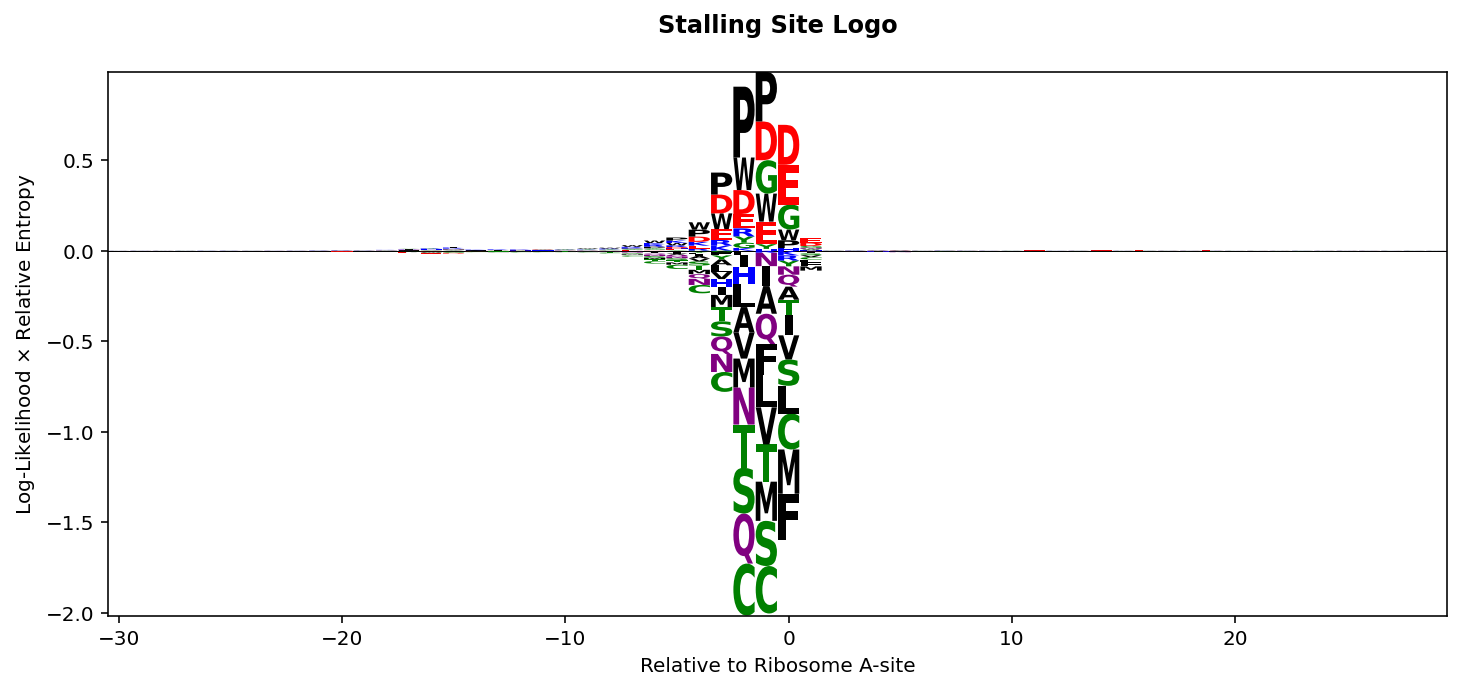

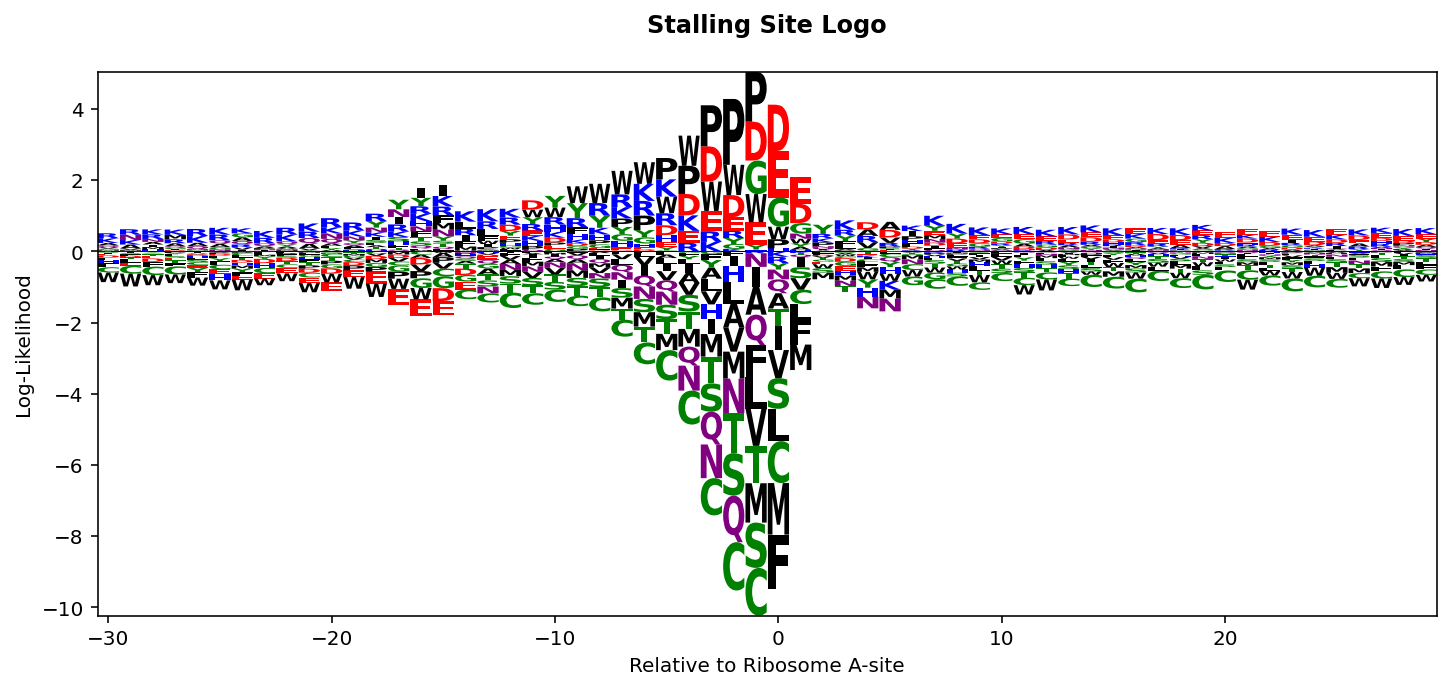

In [8]:
import logomaker
icont = [stats.entropy(dfk_observed.iloc[i], dfk_expected.iloc[i]) for i in range(fl * 2)]
log2_likelihood = np.log2(dfk_observed/ dfk_expected)
to_plot = (log2_likelihood.T * icont).T
fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(to_plot, flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood $\times$ Relative Entropy")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo", y=1.05, fontweight="bold")
plt.show()
fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(log2_likelihood, flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo", y=1.05, fontweight="bold")
plt.show()

## Sequence Logo Scanning Across Proteome

In [15]:
m1 = 24
m2 = 8
sqzd = log2_likelihood.loc[-m1:m2,:]
kersh = m1 + m2 + 1

try:
    motif_exp_calcs, prot_triptle_sum = joblib.load(os.path.join(temp_repo_dir, "jupyter_motif_corr.joblib"))
except:
    motif_exp_calcs = dict()
    prot_triptle_sum = dict()
    for inddd, gene_id in enumerate(I.gene_list):
        if I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id) > 1:
            progress_bar(inddd, len(I.gene_list)-1, verbose=True)
            best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
            prot_seq = I.protein_genome.db[best_transcript][1]
            if "X" in prot_seq or "U" in prot_seq:
                continue
            signl = [np.nan] * m1

            for ind in range(len(prot_seq) + 1 - kersh):
                prot_substring = prot_seq[ind: ind + kersh]
                assert len(prot_substring) == kersh
                signl.append(np.nansum(np.diag(sqzd.iloc[:, [aa.index(i) for i in prot_substring]])))

            signl += [np.nan] * m2
            signl = np.array(signl)

            k0 = I.riboseq_sixtymers.experiment.calculate_rpm_positions(gene_id)
            k0 = k0 / I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)  # it is always multiple of 3
            k0 = np.array([np.sum(k0[i: i+3]) for i in range(0, len(k0) - 2 , 3)])

            motif_exp_calcs[gene_id] = signl
            prot_triptle_sum[gene_id] = k0
    joblib.dump((motif_exp_calcs, prot_triptle_sum), os.path.join(temp_repo_dir, "jupyter_motif_corr.joblib"))

## Check the Model

In [16]:
spearman_corr = dict()
pearson_corr = dict()
for gene_id in prot_triptle_sum:
    k0 = prot_triptle_sum[gene_id]
    signl = motif_exp_calcs[gene_id]
    try:
        k1 = smooth_array(k0[m1:-m2], 31, "hanning")
        k2 = smooth_array(2 ** signl[m1:-m2], 31, "hanning")
    except AssertionError:
        continue
    if np.sum(k1) == 0:
        continue
    k1, k2 = normalization(k1), normalization(k2)
    spearman_corr[gene_id] = stats.spearmanr(k1,k2)
    pearson_corr[gene_id] = stats.pearsonr(k1,k2)

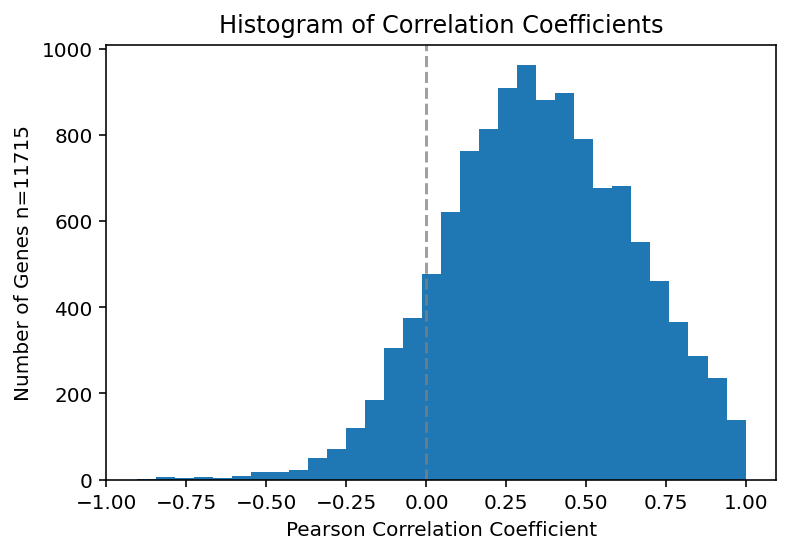

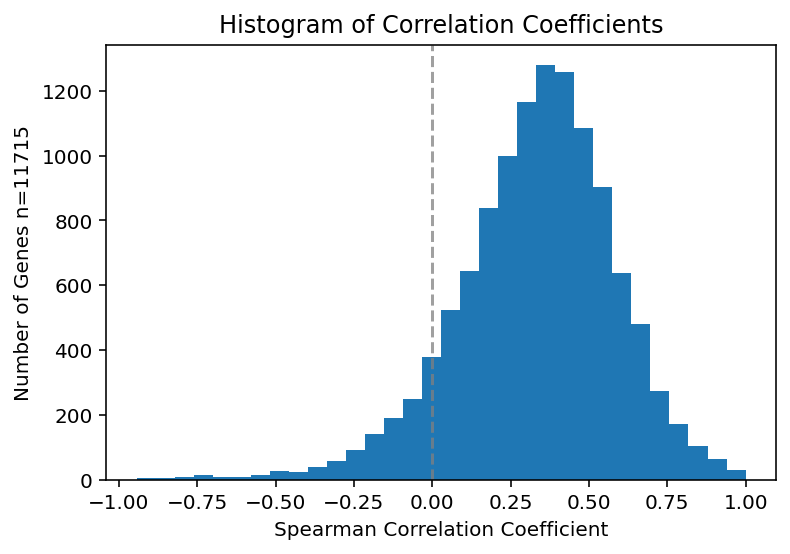

In [17]:
plt.figure(figsize=(6,4))
plt.hist(sorted([i for i,j in pearson_corr.values()]), bins=32)
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Histogram of Correlation Coefficients")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel(f"Number of Genes n={len(pearson_corr)}")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(sorted([i for i,j in spearman_corr.values()]), bins=32)
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Histogram of Correlation Coefficients")
plt.xlabel("Spearman Correlation Coefficient")
plt.ylabel(f"Number of Genes n={len(spearman_corr)}")
plt.show()

(-0.15949136562506755, 0.8244012258066369)
0.3324549300907847
0.3513867274057737


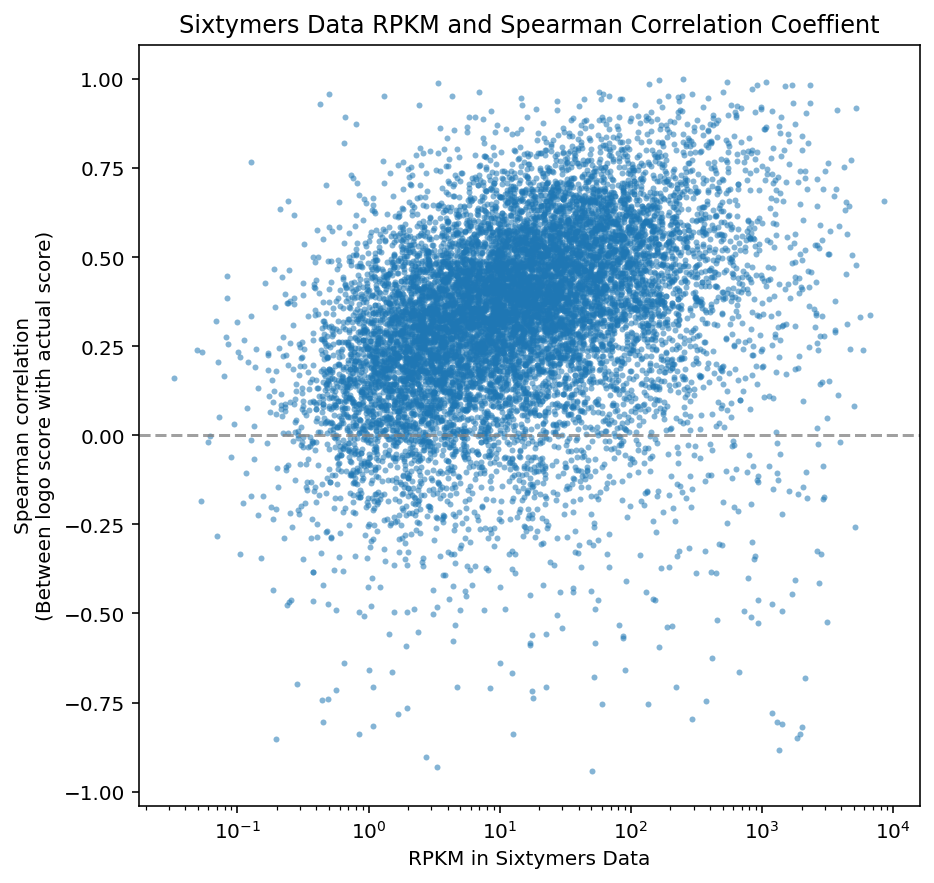

(-0.21401869889742348, 0.9216510086393781)
0.35381615487097734
0.3501651247531211


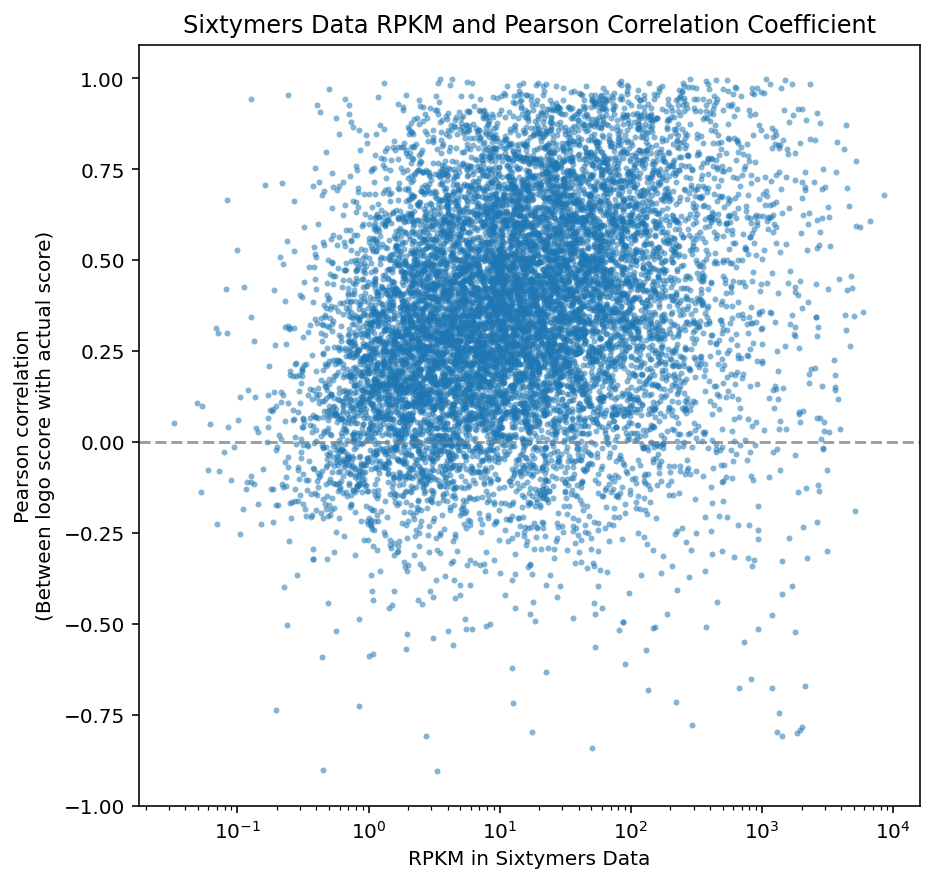

In [18]:
y=[spearman_corr[gene_id][0] for gene_id in spearman_corr]
x=[I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id) for gene_id in spearman_corr]
plt.figure(figsize=(7,7))
plt.scatter(x,y, marker=".", alpha=0.55, linewidths=0)
plt.xscale("log")
plt.axhline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Sixtymers Data RPKM and Spearman Correlation Coeffient")
plt.xlabel("RPKM in Sixtymers Data")
plt.ylabel("Spearman correlation\n(Between logo score with actual score)")
ci=stats.norm.interval(0.95, loc=np.nanmean(y), scale=np.nanstd(y))
print(ci)
print(np.nanmean(y))
print(np.nanmedian(y))
plt.show()

y=[pearson_corr[gene_id][0] for gene_id in pearson_corr]
x=[I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id) for gene_id in pearson_corr]
plt.figure(figsize=(7,7))
plt.scatter(x,y, marker=".", alpha=0.55, linewidths=0)
plt.xscale("log")
plt.axhline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Sixtymers Data RPKM and Pearson Correlation Coefficient")
plt.xlabel("RPKM in Sixtymers Data")
plt.ylabel("Pearson correlation\n(Between logo score with actual score)")
ci=stats.norm.interval(0.95, loc=np.nanmean(y), scale=np.nanstd(y))
print(ci)
print(np.nanmean(y))
print(np.nanmedian(y))
plt.show()

(-0.15949136562506755, 0.8244012258066369)
0.3324549300907847
0.3513867274057737


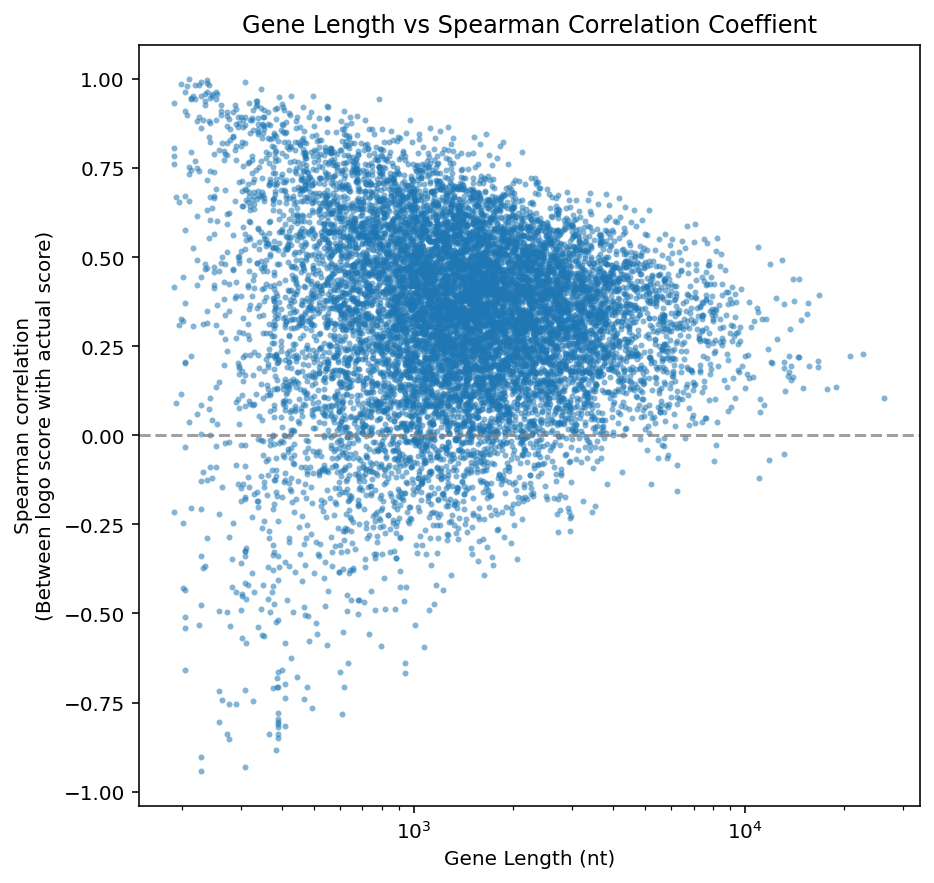

In [19]:
corr = spearman_corr
y=[corr[gene_id][0] for gene_id in corr]
x=[gene_lengths[gene_id] for gene_id in corr]
plt.figure(figsize=(7,7))
plt.scatter(x,y, marker=".", alpha=0.55, linewidths=0)
plt.xscale("log")
plt.axhline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Gene Length vs Spearman Correlation Coeffient")
plt.xlabel("Gene Length (nt)")
plt.ylabel("Spearman correlation\n(Between logo score with actual score)")
ci=stats.norm.interval(0.95, loc=np.nanmean(y), scale=np.nanstd(y))
print(ci)
print(np.nanmean(y))
print(np.nanmedian(y))
plt.show()

In [20]:
highly_correlated = [i for i in spearman_corr if spearman_corr[i][0] > 0.6]
print(highly_correlated[5:15])
print(len(highly_correlated))

['ENSG00000004455', 'ENSG00000004660', 'ENSG00000004779', 'ENSG00000005059', 'ENSG00000005194', 'ENSG00000005249', 'ENSG00000006007', 'ENSG00000006042', 'ENSG00000006634', 'ENSG00000007080']
1452


In [1]:
for gene_id in ["ENSG00000005206", "ENSG00000004487", "ENSG00000080822", "ENSG00000005249"]:
    # ["ENSMUSG00000009995", "ENSMUSG00000015536", "ENSMUSG00000006014"]:
    # asd
    #gene_id = highly_correlated[i]

    palette = sns.color_palette("cubehelix", 3)
    a1=smooth_array(motif_exp_calcs[gene_id][m1:-m2], 35, "hanning")
    a2=smooth_array(prot_triptle_sum[gene_id][m1:-m2], 35, "hanning")
    b1=prot_triptle_sum[gene_id][m1:-m2]

    fig, ax = plt.subplots(1,1,figsize=[12,4])
    plt.plot(normalization(b1), label="Normalized Sixtymers Data", color=palette[0], alpha=0.35)
    plt.plot(normalization(a1), label="Predicted", color=palette[2])
    plt.plot(normalization(a2), label="Smoothened", color=palette[1])


    corr, pval = stats.spearmanr(normalization(a1), normalization(a2))
    rpkm_gene_b = I.riboseq_sixtymers.background.calculate_rpkm_genes(gene_id)
    rpkm_gene_e = I.riboseq_sixtymers.experiment.calculate_rpkm_genes(gene_id)

    ax.text(1.015, 0.05, "Spearman corr = %.2f\np-value = %.3e\n\nRPKM Total Trans. = %.2f\nRPKM Sixtymers = %.2f" % (corr, pval, rpkm_gene_b, rpkm_gene_e), 
                transform=ax.transAxes, verticalalignment='bottom', horizontalalignment="left", alpha=1,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.25))
    plt.xlabel("Aminoacids from Start site")
    plt.ylabel("Scaled Arbitrary Signal")
    plt.title(gene_id)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.show()

NameError: name 'sns' is not defined

## Sequence Logo False Positives and False Negatives
Note that presumably not all sequence with a similar sequence logo cause collision) 

In [ ]:
# Get average score and graph of collision at detected collision points

In [ ]:
collision_scores = list()
estimateds = list()
for inddd, gene_id in enumerate(motif_exp_calcs):
    actual = smooth_array(prot_triptle_sum[gene_id][m1:-m2], 31, "hanning")
    estimated = smooth_array(2**motif_exp_calcs[gene_id][m1:-m2], 31, "hanning")
    collision_points = np.floor(gene_collision[gene_id] / 3 - m1)
    for i in collision_points:
        i = int(i)
        try:
            collision_scores.append([actual[i], estimated[i]])
        except IndexError:
            pass
    estimateds.extend(list(estimated))
collision_scores = np.array(collision_scores)
estimateds = np.array(estimateds)

In [ ]:
# median of predicted score in actual collision peaks.
psacp = np.nanmedian(collision_scores, axis=0)
#psacp = np.nanpercentile(collision_scores, 15, axis=0)
print(psacp)
psacp = psacp[1]

fig, ax = plt.subplots(1,2,figsize=[12,4], sharey=True)
ax[0].hist(collision_scores.T[0], density=True)
ax[0].axvline(psacp, color="black")
ax[1].hist(estimateds, density=True)
ax[1].axvline(psacp, color="black")
ax[0].set_ylabel("Density")
ax[0].set_xlabel("Smoothened Estimated Score")
ax[0].set_title("Only for calculated collision peaks")
ax[1].set_title("For all positions")
ax[1].set_ylabel("Density")
ax[1].set_yscale("log")
ax[1].set_xlabel("Smoothened Estimated Score")
plt.show()

In [ ]:
# Get all other points where you have high similarity but no collision peaks. (False negatives)
# Plot metagene of these points
    # Conservation around these points

In [ ]:
len(motif_exp_calcs)

In [ ]:
gene_collision_estimated = dict()
for gene_id in motif_exp_calcs:
    estimated = smooth_array(2 ** motif_exp_calcs[gene_id][m1:-m2], 31, "hanning")
    peaks = find_peaks(estimated)[0]
    gene_collision_estimated[gene_id] = (peaks[estimated[peaks] > psacp] + m1) * 3
np.concatenate(list(gene_collision_estimated.values())).shape

In [ ]:
def true_positive_peaks(peaks_actual, peaks_estimated, offset=20):
    true_positive = list()
    for pe in peaks_estimated:
        for pa in peaks_actual:
            if pe - offset <= pa <= pe + offset:
                true_positive.append(pe)
    return true_positive

* Change below to I.gene_list to see plot below information content

In [ ]:
geneLIST = I.gene_list

high_signal_but_low_prob = dict()
high_signal_and_high_prob = dict()
for gene_id in gene_collision_estimated:
    if gene_id in geneLIST: # HERE!
        temp = true_positive_peaks(gene_collision_estimated[gene_id], gene_collision[gene_id])
        sap = [i for i in gene_collision[gene_id] if i not in temp]
        high_signal_and_high_prob[gene_id] = temp
        high_signal_but_low_prob[gene_id] = sap
print(np.concatenate(list(high_signal_and_high_prob.values())).shape)
print(np.concatenate(list(high_signal_but_low_prob.values())).shape)

In [ ]:
fill_matrix = np.zeros((fl * 2, len(aa)))
for gene_id in high_signal_but_low_prob:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    protein_seq = "."*fl + I.protein_genome.db[best_transcript][1] + "."*fl
    for nt_position in high_signal_but_low_prob[gene_id]:
        aa_position = math.floor(nt_position / 3) + fl
        fpca = protein_seq[aa_position-fl: aa_position+fl]
        for i_fl in range(fl * 2):
            try:
                # Increase the relevant position with normalized intensity
                fill_matrix[i_fl, aa.index(fpca[i_fl])] += 1
            except ValueError:
                pass  # Raises ValueError for non-conventional amino acids or "."
dfk_observed = pd.DataFrame((fill_matrix.T / np.sum(fill_matrix, axis=1)).T, columns=aa, index=np.arange(-fl, fl))
sonc1 = [stats.entropy(dfk_observed.iloc[i], dfk_expected.iloc[i]) for i in range(fl * 2)]

In [ ]:
to_plot = (np.log2(dfk_observed/ dfk_expected).T * sonc1).T

fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(to_plot, flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood $\times$ Relative Entropy")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks for False Positives (Collision peak but low estimation)", y=1.05, fontweight="bold")
plt.show()

fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(np.log2(dfk_observed/ dfk_expected), flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks for False Positives (Collision peak but low estimation)", y=1.05, fontweight="bold")
plt.show()

In [ ]:
fill_matrix = np.zeros((fl * 2, len(aa)))
for gene_id in high_signal_and_high_prob:
    best_transcript = I.gene_info[gene_id].transcripts.iloc[0][0]  # At least 1 transcript exists
    protein_seq = "."*fl + I.protein_genome.db[best_transcript][1] + "."*fl
    for nt_position in high_signal_and_high_prob[gene_id]:
        aa_position = math.floor(nt_position / 3) + fl
        fpca = protein_seq[aa_position-fl: aa_position+fl]
        for i_fl in range(fl * 2):
            try:
                # Increase the relevant position with normalized intensity
                fill_matrix[i_fl, aa.index(fpca[i_fl])] += 1
            except ValueError:
                pass  # Raises ValueError for non-conventional amino acids or "."
dfk_observed = pd.DataFrame((fill_matrix.T / np.sum(fill_matrix, axis=1)).T, columns=aa, index=np.arange(-fl, fl))
sonc2 = [stats.entropy(dfk_observed.iloc[i], dfk_expected.iloc[i]) for i in range(fl * 2)]

In [ ]:
to_plot = (np.log2(dfk_observed/ dfk_expected).T * sonc2).T

fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(to_plot, flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood $\times$ Relative Entropy")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks for True Positives (Collision peak and high estimation)", y=1.05, fontweight="bold")
plt.show()

fig, ax = plt.subplots(1,1,figsize=[12,5])
ss_logo = logomaker.Logo(np.log2(dfk_observed/ dfk_expected), flip_below=False, color_scheme='chemistry', ax=ax)
ss_logo.ax.set_ylabel(r"Log-Likelihood")
ss_logo.ax.set_xlabel("Relative to Ribosome A-site")
ss_logo.ax.set_title("Stalling Site Logo for Ribosome Peaks for True Positives (Collision peak and high estimation)", y=1.05, fontweight="bold")
plt.show()

In [ ]:
plt.plot(np.arange(-fl, fl), icont, label="All")
plt.plot(np.arange(-fl, fl), sonc1, label="True Positives")
plt.plot(np.arange(-fl, fl), sonc2, label="False Positives")
plt.axvline(0, color="gray", alpha=0.75, linestyle = "--")
plt.title("Information Content - All genes")
plt.ylabel("Shannon bit")
plt.xlabel("Relative to Ribosome A-site")
plt.legend()
plt.show()

In [ ]:
# Plot conservation around these regions

In [ ]:
# FALSE NEGATIVES: have high similarity but no collision peaks

## Training the Coefficients

In [ ]:
# Searching Sequence Logo of Collision Sites around Coco Onset